Estudiante 1: 
<br>
Estudiante 2:

# IMEC2001 Herramientas Computacionales 
## Taller Semana 3: Interpolación - Curva de una Bomba
### Fecha Límite Entrega (Bloque Neón): <font color="#FF5733"> 15:29h de Noviembre 3, 2022</font>

Universidad de los Andes — Octubre 27, 2022.

___
### <u>Tener en Cuenta</u>
- La entrega del taller es por Bloque Neon y el formato de envío es Jupyter Notebook (extensión '.ipynb').
- El nombre del archivo debe ser: T3_SalazarPeña_VargasTorres
- En la casilla anterior a esta coloque el nombre de los integrantes del grupo.
- El taller solo lo envía <b>1</b> integrante del grupo.
___

# Interpolación - Curva de una Bomba

En algunos problemas de ingeniería, se requiere extraer diferentes datos que no están expresados con una función explícita. En este caso, para resolver diversos problemas de flujo interno (por ejemplo, tuberías) se requiere hacer un ajuste de curva o bien una interpolación para conocer los puntos intermedios. En este módulo se explorarán las herramientas de interpolación de la librería ``SciPy``. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería dando clic aquí [`SciPy`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) 
</div>

El ejemplo de este taller se basa en las curvas de desempeño de las bombas, en la que la cabeza del sistema de bombeo depende del caudal al que esté operando la bomba en ciertas velocidades angulares específicas. A continuación se puede ver un ejemplo del libro de Mecánica de Fluidos de White:

<img src="./img/bomba.png" width="500" height="600">

Las líneas rosas hacen referencia a la función de cabeza vs caudal, las líneas negras a eficiencia de la bomba a determinadas condiciones y la línea gruesa NPSH es la cabeza mínima del sistema para un funcionamiento adecuado sin cavitación. 

----
El propósito de este taller es poder realizar una interpolación de las diferentes gráficas y visualizarlas utilizando las herramientas vistas en clase, para así poder tener una idea de cómo funcionan las diferentes técnicas de interpolación, en este caso utilizaremos el método de lagrange y los splines o trazadores.


## <u>Polinomio interpolador de Lagrange y fenómeno de Runge</u>

Una de las técnicas más populares para pequeñas bases de datos el polinomio interpolador de Lagrange, que toma $n$ puntos en ambos ejes y aproximar un polinomio de grado $n-1$ que haga un ajuste a la curva. Por ejemplo si se toman 3 puntos, se aproxima a una parábola. Es importante tener en cuenta que si se toman muchos puntos, por ejemplo 5 o 6, el método puede presentar grandes errores, algo conocido como el fenómeno de Runge. A continuación se podrá entender cómo funciona este método y cómo evitar los diferentes errores. 

Una expresión matemática que nos ayuda a entender el comportamiento de un interpolador de Lagrange es la siguiente, dada una cantidad de puntos $k+1$ aproximada a una función $L(x)$:

$$ L(x) = \sum\limits_{j = 0}^ k y_j \times \prod_{m \neq j}^{k} \frac{x-x_m}{x_j - x_m}$$

El error de Runge que se tiene está descrito como 
$$R_n=f[x,x_n,x_{n-1},...,x_0]\prod_{i=0}^n(x-x_i)$$

In [4]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt

A continuación se muestra la implementación del método de Lagrange:

In [2]:
def productoria(X_arreglo: np.array, i: np.array, x_init: np.array)-> np.array:
    """
    Función que calcula la productoria

    Parameters
    ----------
    X_arreglo : np.array
        Array con los valores originales 
    i : np.array
        Identificador del i de la función productoria [#! Recuerde que i != j] 
    x_init : np.array
        Array con los valores de los que se quiere encontrar la interpolación

    Returns
    -------
    valor : np.array
        Valores para cada punto. 

    """
    n = len(X_arreglo)                                                           # Todos los puntos que tengo
    valor = 1                                                                    # Valor original para la multiplicación
    for j in range(n):
        if j != i:                                        # Comprobación de que el i sea diferente al j en las posiciones
            valor *= (x_init - X_arreglo[j])/(X_arreglo[i] - X_arreglo[j])       # Productoria
    return valor

def interp_lagrange(X: np.array, Y: np.array, x_inter: np.array) -> np.array:
    """
    Función que implementa la interpolación de Lagrange

    Parameters
    ----------
    X : np.array
        Array de los valores originales en x
    Y : np.array
        Array de los valores originales en y
    x_inter : np.array
        Array con los valores de los que se quiere encontrar la interpolación

    Returns
    -------
    valor : np.array
        Array con los puntos interpolados 

    """
    valor = 0                                          # Valor inicial para empezar a sumar
    for i in range(len(X)):
        valor += productoria(X, i, x_inter) * Y[i]    
    return valor

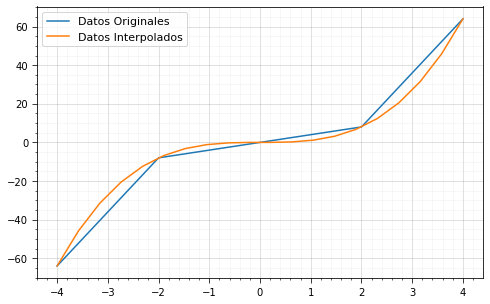

In [3]:
# Ejemplo datos a interpolar utilizando las funciones anteriormente implementadas

# Puntos originales
x_int = np.linspace(-4, 4, 5) # 3 puntos, entonces se toma un polinomio de orden 2
y_int = x_int**3

# Datos a interpolar
x_inter = np.linspace(-4, 4, 20)
y_res = interp_lagrange(x_int,y_int, x_inter)

# Gráfica 
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_int, y_int, label = "Datos Originales")
plt.plot(x_inter, y_res, label = "Datos Interpolados")
plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.legend(loc='best', fontsize=11)
plt.show()

El polinomio interpolador de Lagrange funciona perfectamente para una parábola. Ahora se puede analizar qué pasa si se se tiene una función más compleja. 

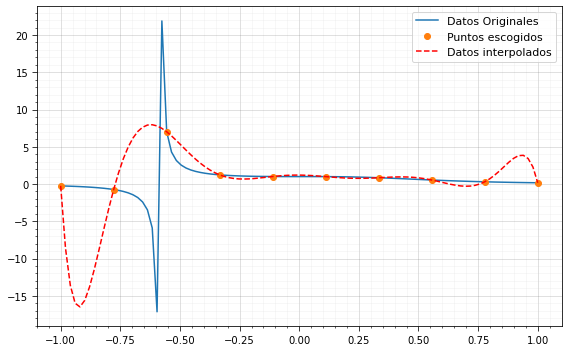

In [4]:
def f(x): return 1/(1+5*x**3)

x_exp = np.linspace(-1,1,100)
y_exp = f(x_exp)

# Puntos a interpolar mal
x_intmal = np.linspace(-1,1,10)
y_intmal = f(x_intmal)
y_resmal = interp_lagrange(x_intmal,y_intmal,x_exp)

# Gráfica 
hor = 8
ver = 5

plt.figure(figsize=(hor, ver))

plt.plot(x_exp, y_exp, label = "Datos Originales")
plt.plot(x_intmal, y_intmal, 'o', label = "Puntos escogidos")
plt.plot(x_exp, y_resmal, 'r--', label = "Datos interpolados")
plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.legend(loc='best', fontsize=11)
plt.tight_layout()
plt.show()


Lo anterior evidencia el error de Runge que se comentó anteriormente, no siempre es conveniente usar un interpolador de Lagrange para funciones complejas, más aun cuando se requiere utilizar otros métodos computacionales.


## <u>Interpolaciones con la librería `SciPy.interpolate`</u>

Ya que se conoce la lógica detrás del método numérico para uno de los métodos más comunes de interpolación, se pasa a utilizar una de las librerías que se encuentra en python, esto permite no solamente realizar las operaciones de manera rápida sino eficiente ya que no siempre se tiene el tiempo para implementar el método numérico. 

1. Interpolación polinómica [[``.interp1d``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)] 
3. Interpolación Lagrange   [[``.lagrange``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange)]
4. Interpolación Splines    [[``.splev``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev)] [[``.splev``]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep) 

## Importar librerías:

Para importar la librería se utiliza la siguiente línea de código:

* ``from scipy import interpolate as inter``

<div class="alert alert-block alert-warning">
En este caso el <i> alias </i> es inter, pero lo puede cambiar por uno diferente sin que sea int, ya que este es un tipo de dato de python.
</div>

In [5]:
from scipy import interpolate as inter 

def graficas(x_exp: np.array, y_exp: np.array, x_intmal: np.array, y_intmal: np.array, x_res, y_res, ax) -> None: 
    hor = 8
    ver = 5

    plt.figure(figsize=(hor, ver))

    ax.plot(x_exp, y_exp, label = "Datos Originales")
    ax.plot(x_intmal, y_intmal, 'o', label = "Puntos escogidos")
    ax.plot(x_res, y_res, 'r--', label = "Datos interpolados")
    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    ax.legend(loc='best', fontsize=11)

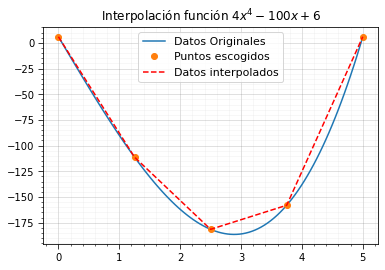

<Figure size 576x360 with 0 Axes>

In [66]:
def f(x): return (4*x**3-100*x+6)

# Función real
x_real = np.linspace(0, 5, 100) 
y_real = f(x_real)

# Datos para interpolar
x_int = np.linspace(0, 5, 5)
y_int = f(x_int)

"""
Pasos:
1. Se asigna a una variable la función inter.interp1d con los datos 
   en x y en y que se quieren interpolar.
2. Se llama la función con los x de los que se quiere saber su valor
"""
interp_lineal = inter.interp1d(x_int, y_int, kind='linear') 
y_fun_int = interp_lineal(x_int)

fig, ax = plt.subplots()

graficas(x_real, y_real, x_int, y_int, x_int, y_fun_int, ax)
ax.set_title(r'Interpolación función $4x^4-100x+6$')
plt.show()

Con la gráfica anterior se evidencia que las interpolaciones lineales cuando se tiene muy pocos puntos puede dar paso a errores numéricos, una forma de corregir lo anterior es agregar más puntos.

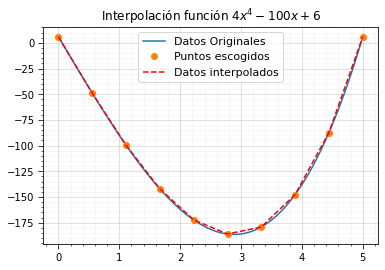

<Figure size 576x360 with 0 Axes>

In [67]:
def f(x): return (4*x**3-100*x+6)

# Función real
x_real = np.linspace(0, 5, 100) 
y_real = f(x_real)

# Datos para interpolar
x_int = np.linspace(0, 5, 10) # Se cambia el número de puntos que se consideran
y_int = f(x_int)

"""
Pasos:
1. Se asigna a una variable la función inter.interp1d con los datos 
   en x y en y que se quieren interpolar.
2. Se llama la función con los x de los que se quiere saber su valor
"""
interp_lineal = inter.interp1d(x_int, y_int, kind='linear') 
y_fun_int = interp_lineal(x_int)

fig, ax = plt.subplots()

graficas(x_real, y_real, x_int, y_int, x_int, y_fun_int, ax)
ax.set_title(r'Interpolación función $4x^4-100x+6$')
plt.show()

Con las dos gráficas anteriores se evidencia que se tiene un mejor ajuste cuando se cuenta con más puntos. Una de las referencias donde pueden encontrar más información sobre la interpolación con polinomios es el libro <font color="blue">Métodos Numéticos para ingenieros de Steven C. Chapla y Raymon P. Canale. </font>

## Interpolación por Splines

<img src=./img/Trazadores.jpg  width="100" height="5">

En este caso, se trata de un tipo de interpolación más preciso, en el que se pueden usar puntos que no son necesariamente espaciados uniformemente, esto debido a que en algunos casos se tiene una función en la que un solo polinomio para todos los puntos no describe exactamente su comportamiento. La librería SpiCy también permite el cálculo por este método, para el utilizar las funciones se utilizarán dos de sus funciones 

1. [```splrep```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep) 
Devuelve una tupla con el número de nodos [Puntos azules], los coeficientes de los tramos y el grado del polinomio.
```python
def_param = inter.splrep(x, y)
```
2. [```splev```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev) 
Tomando los nodos y los coeficientes de la función anterior, toma una lista con n puntos los cuales interpola dentro del intervalo dado.
```python
y_inter = inter.splev(x_nuevo, def_param)
```

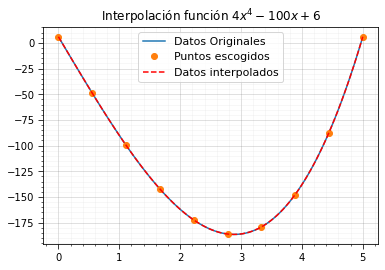

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [68]:
def f(x): return (4*x**3-100*x+6)

x_int = np.linspace(0, 5, 10) # Se cambia el número de puntos que se consideran
y_int = f(x_int)
def_param = inter.splrep(x_int, y_int)

# Se tiene una mayor precisión 
x_nuevo = np.linspace(0, 5, 100)
y_inter = inter.splev(x_nuevo, def_param)

fig, ax = plt.subplots()

plt.figure(figsize=(8, 5))

graficas(x_real, y_real, x_int, y_int, x_nuevo, y_inter, ax)

ax.set_title(r'Interpolación función $4x^4-100x+6$')
plt.show()

## Polinomio interpolador de Lagrange

Ya implementado el método numérico, se mira en la librería SciPy si existe una función que nos permita realizar el procedimiento, para esto utilizaremos la función [```lagrange```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange). Esta realiza el mismo procedimiento, como parámetros se tiene las coordenadas de x y de y, este retorna explicitamente el polinomio de lagrange, por lo cual se utilizará de la librería numpy [```polynomial.polynomial```](https://numpy.org/doc/stable/reference/routines.polynomials.html) la cual toma los coeficientes del resultado de la función anterior y después para cada uno de los puntos opera, encontrando su respectivo punto y. A continuación se muestra un ejemplo de cómo se puede implementar:

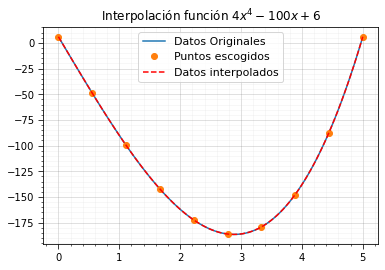

<Figure size 576x360 with 0 Axes>

In [76]:
from numpy.polynomial.polynomial import Polynomial

def f(x): return (4*x**3-100*x+6)

x_int = np.linspace(0, 5, 10) 
y_int = f(x_int)
lag_poly = inter.lagrange(x_int, y_int)

polim = Polynomial(lag_poly.coef[::-1])

x_nuevo = np.linspace(0, 5, 100)
y_nuevo = polim(x_nuevo)

fig, ax = plt.subplots()

graficas(x_real, y_real, x_int, y_int, x_nuevo, y_nuevo, ax)

ax.set_title(r'Interpolación función $4x^4-100x+6$')
plt.show()

# Parte práctica

Se quieren realizar las curvas características de la bomba, las que se encuentran de color rosado en la primera gráfica del taller. Para esto realice los siguientes pasos:

1. Cree dos funciones en cada una debe utilizar una de las librerías vistas en clase o las que se encuentran en el taller (interp1d, splev, Polynomial, etc). A continuación se encuentra un ejemplo del formato que se debe utilizar junto con dos posibles librerías que se pueden utilizar:

``` Python
def fun_1(param_1: tipo, param_2: tipo, ....)-> tipo que se retorna:
    """
    Descripción de la función

    Parameters
    ----------
    param_1 : tipo
        Descripción del parámetro
    param_2 : tipo
        Descripción del parámetro

    Returns
    -------
    variable : tipo
        Descripción de la variable 
    """
    Variables y operaciones con el método polynomial
```

``` Python
def fun_2(param_1: tipo, param_2: tipo, ....)-> tipo que se retorna:
    """
    Descripción de la función 

    Parameters
    ----------
    param_1 : tipo
        Descripción del parámetro
    param_2 : tipo
        Descripción del parámetro

    Returns
    -------
    variable : tipo
        Descripción de la variable 
    """
    Variables y operaciones con el método interp1d
```

2. De cada una de las curvas tome 4 puntos y utilice las funciones realizadas en el paso 1 para interpolar entre los mismos. 

3. Con los datos del punto 2 mostrar en una sola gráficas las 3 interpolaciones realizadas.
*Tener en cuenta:* 
- Debe utilizar las 2 funciones creadas.
- Las gráficas deben tener los elementos de las gráficas vistos en clase (xlabel, ylabel, legend, etc).

4. Retorne un DataFrame por cada interpolación realizada, este debe tener:
- Datos originales que tomó de la gráfica
- Datos interpolados

*Ayuda:* Una función de la librería pandas le permita unir los datos que tengan  diferente número de datos. 

<b>Nota:</b> Comente el código en las secciones que considere necesario.